# Analyzing Seasonal Staffing Trends

### Question to Answer
- Does a higher dependence on contractors lead to better or worse quality scores? 

### Objective
- To help Clipboard Health determine where their staffing solutions can significantly improve care quality.

### Methodology

- Create Contractor Usage Metric
- Examine CMS Quality Scores
- Correlate Contractor Usage with Quality Scores

#### Importing Libraries and Loading Dataset

In [12]:
# Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np


# Load the cleaned PBJ dataset
df_cleaned = pd.read_csv('C:/Users/hp/Downloads/Cleaned_PBJ_Daily_Nurse_Staffing_Q1_2024.csv')

# Load the cleaned sn dataset
df_sn_cleaned = pd.read_csv(
    'C:/Users/hp/Downloads/Cleaned_Skilled_Nursing_Facility_Quality_Reporting_Program_Provider_Data_Aug2024.csv'
)

C:\Users\hp\AppData\Local\Temp\ipykernel_10768\3406516609.py:9: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df_cleaned = pd.read_csv('C:/Users/hp/Downloads/Cleaned_PBJ_Daily_Nurse_Staffing_Q1_2024.csv')
C:\Users\hp\AppData\Local\Temp\ipykernel_10768\3406516609.py:12: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df_sn_cleaned = pd.read_csv(


#### Create Contractor Usage Metric

In [9]:
df_cleaned['Hrs_RNDON_ctr'].sum()

124692.23999999996

In [2]:
# Sum of all contractor hours
df_cleaned['Total_Contractor_Hours'] = (
    df_cleaned['Hrs_RNDON_ctr'] + df_cleaned['Hrs_RNadmin_ctr'] +
    df_cleaned['Hrs_RN_ctr'] + df_cleaned['Hrs_LPNadmin_ctr'] +
    df_cleaned['Hrs_LPN_ctr'] + df_cleaned['Hrs_CNA_ctr'] +
    df_cleaned['Hrs_NAtrn_ctr'] + df_cleaned['Hrs_MedAide_ctr']
)

# Sum of all employee hours
df_cleaned['Total_Staffing_Hours'] = (
    df_cleaned['Hrs_RNDON_emp'] + df_cleaned['Hrs_RNadmin_emp'] +
    df_cleaned['Hrs_RN_emp'] + df_cleaned['Hrs_LPNadmin_emp'] +
    df_cleaned['Hrs_LPN_emp'] + df_cleaned['Hrs_CNA_emp'] +
    df_cleaned['Hrs_NAtrn_emp'] + df_cleaned['Hrs_MedAide_emp']
)

# Select relevant columns from df_cleaned
df_relevant = df_cleaned[['PROVNUM', 'Total_Contractor_Hours', 'Total_Staffing_Hours']]

# Select relevant columns from df_sn_cleaned
df_sn_relevant = df_sn_cleaned[['PROVNUM', 'Score']]

# Merge the datasets on 'PROVNUM'
merged_df = pd.merge(df_relevant, df_sn_relevant, on='PROVNUM', how='inner')


#### Examine CMS Quality Scores

In [3]:

# Calculate Contractor Usage Percentage
merged_df['Contractor_Usage_Percentage'] = (merged_df['Total_Contractor_Hours'] / merged_df['Total_Staffing_Hours']) * 100

# Correlation between Contractor Usage and CMS Quality Score
correlation = merged_df[['Contractor_Usage_Percentage', 'Score']].corr()

#### Correlate Contractor Usage with Quality Scores

In [4]:
# Categorize quality scores into Low, Medium, High and analyze average contractor usage
def categorize_quality(score):
    if score < 30:
        return 'Low'
    elif 30 <= score <= 70:
        return 'Medium'
    else:
        return 'High'

merged_df['Quality_Category'] = merged_df['Score'].apply(categorize_quality)

# Calculate average contractor usage per quality category
avg_contractor_usage = merged_df.groupby('Quality_Category')['Contractor_Usage_Percentage'].mean()

In [13]:
# Check for rows with infinite values
inf_values = merged_df[np.isinf(merged_df['Contractor_Usage_Percentage'])]
print("Rows with infinite values in Contractor_Usage_Percentage:\n", inf_values)

# Replace infinite values with NaN
merged_df['Contractor_Usage_Percentage'].replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows where Contractor_Usage_Percentage is NaN 
merged_df.dropna(subset=['Contractor_Usage_Percentage'], inplace=True)

# Check if there are any unrealistic high values (e.g., greater than 100 for percentages)
unrealistic_values = merged_df[merged_df['Contractor_Usage_Percentage'] > 100]

# Cap the outliers to 100 (since percentages can't exceed 100)
merged_df['Contractor_Usage_Percentage'] = merged_df['Contractor_Usage_Percentage'].clip(upper=100)

Rows with infinite values in Contractor_Usage_Percentage:
          PROVNUM  Total_Contractor_Hours  Total_Staffing_Hours      Score  \
4161178   075034                   14.50                   0.0  254.00000   
4161179   075034                   14.50                   0.0  254.00000   
4161180   075034                   14.50                   0.0  100.00000   
4161181   075034                   14.50                   0.0   56.74704   
4161182   075034                   14.50                   0.0    7.16000   
...          ...                     ...                   ...        ...   
43121895  676100                  240.42                   0.0  169.00000   
43121896  676100                  240.42                   0.0   81.60000   
43121897  676100                  240.42                   0.0   56.74704   
43121898  676100                  240.42                   0.0   56.74704   
43121899  676100                  240.42                   0.0   56.74704   

          Contra

C:\Users\hp\AppData\Local\Temp\ipykernel_10768\3773706210.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_df['Contractor_Usage_Percentage'].replace([np.inf, -np.inf], np.nan, inplace=True)


Unrealistic percentage values:
          PROVNUM  Total_Contractor_Hours  Total_Staffing_Hours      Score  \
230742    025024                  158.82                116.07   56.74704   
230743    025024                  158.82                116.07   56.74704   
230744    025024                  158.82                116.07   56.74704   
230745    025024                  158.82                116.07   56.74704   
230746    025024                  158.82                116.07   56.74704   
...          ...                     ...                   ...        ...   
44847411  745004                  145.12                124.97   72.00000   
44847412  745004                  145.12                124.97   82.80000   
44847413  745004                  145.12                124.97  139.00000   
44847414  745004                  145.12                124.97   77.00000   
44847415  745004                  145.12                124.97   55.40000   

          Contractor_Usage_Percentage Quali

In [16]:
# Replace infinite contractor usage percentages with 100 (since all staffing was done by contractors)
merged_df.loc[merged_df['Contractor_Usage_Percentage'] == np.inf, 'Contractor_Usage_Percentage'] = 100

# Cap contractor usage percentage at 100 for unrealistic values
merged_df['Contractor_Usage_Percentage'] = merged_df['Contractor_Usage_Percentage'].clip(upper=100)

# Verify the results
print(merged_df['Contractor_Usage_Percentage'].describe())



count    4.479304e+07
mean     9.411678e+00
std      1.892306e+01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.023018e+01
max      1.000000e+02
Name: Contractor_Usage_Percentage, dtype: float64


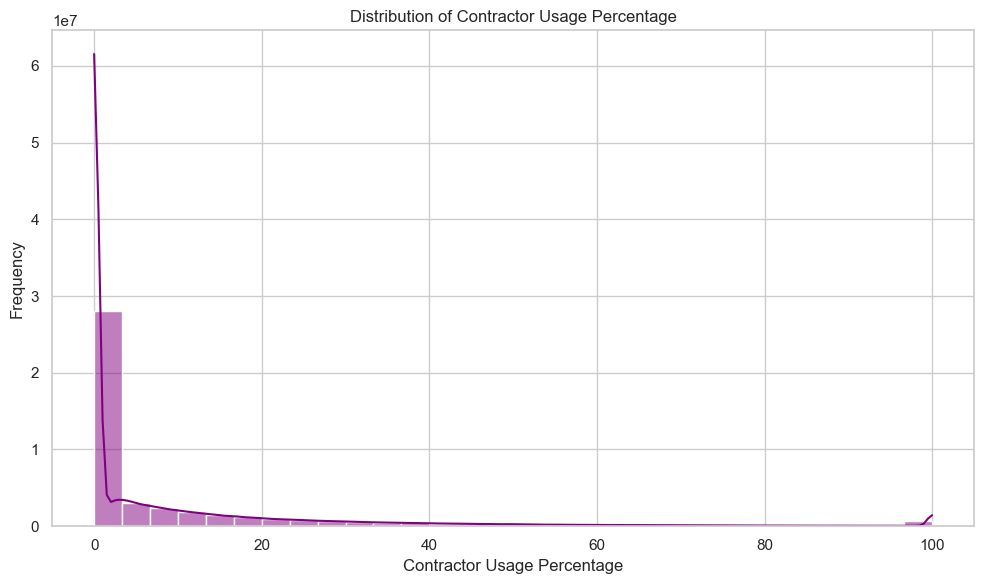

In [17]:
# Histogram - Distribution of Contractor Usage Percentage
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['Contractor_Usage_Percentage'], bins=30, kde=True, color='purple')
plt.title('Distribution of Contractor Usage Percentage')
plt.xlabel('Contractor Usage Percentage')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()
